In [350]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
# Import train_test_split function
from sklearn.model_selection import train_test_split
#Import Random Forest Model classifier
from sklearn.ensemble import RandomForestClassifier
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
from sklearn.metrics import mean_squared_error
import seaborn as sns
pd.set_option('max_columns', None)
%matplotlib inline

In [351]:
# Open calendar and listings data
boston_calendar = pd.read_csv("boston_airbnb_data/calendar.csv")
boston_listings = pd.read_csv("boston_airbnb_data/listings.csv")

In [352]:
# Drop price column because we don't need it for our analysis
boston_calendar = boston_calendar.drop('price', axis=1)
# Get one column for each variable on for t(true) and one for f(false)
boston_calendar = pd.concat([boston_calendar.drop('available', axis=1), pd.get_dummies(boston_calendar['available'], prefix='available', prefix_sep='_')], axis=1)
# Group by each list id by adding the number of times each list_id is available and unavailable
boston_occupation = boston_calendar.groupby("listing_id").sum()
# Add a column with the occupancy percentage, which is the number of days occupied divided by the total number of days registered
boston_occupation["occupation_percentage"] = boston_occupation["available_f"]*100/(boston_occupation["available_f"]+boston_occupation["available_t"])

In [353]:
# Function Transform the output variable occupation_percentage that is continuous to categorical with five levels
def percentage_to_categorical(value):
    value = float(value)
    if value == 0:
        return 1
    elif value > 0 and value <= 100:
        return math.ceil(value/20)   
    else:
        return np.nan

In [354]:
# Apply function
boston_occupation["occupation_percentage"] = boston_occupation["occupation_percentage"].apply(percentage_to_categorical)
# Drop columns will no longer be used
boston_occupation = boston_occupation.drop(["available_f","available_t"], axis=1)

In [355]:
# Create a consolidate dataframe with all the listings data and the ocupation percentage
df = pd.merge(boston_listings, boston_occupation,left_on="id",right_on="listing_id", how="inner")

In [356]:
df.head
df.describe(include="all")

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,occupation_percentage
count,3.585000e+03,3585,3.585000e+03,3585,3585,3442,2528,3585,3585,2170,1610,2295,2096,2031,2393,2986,2986,3585,2986,3.585000e+03,3585,3585,3585,3574,2276,3114,3114,3114,3585,3585,3585,3246,3585.000000,3585.000000,3585,3585,3585,3585,3042,3585,0.0,3583,3585,3547,3571,3585,3585,3585,3585.000000,3585.000000,3585,3582,3585,3585.000000,3571.000000,3575.000000,3576.000000,3585,3585,56.000000,3585,892,888,1342,2478,3585.000000,3585,3585.000000,3.585000e+03,3585,0.0,3585.00000,3585.000000,3585.000000,3585.000000,3585,3585.000000,2829,2829,2772.000000,2762.000000,2767.000000,2765.000000,2767.000000,2763.000000,2764.000000,3585,0.0,0.0,3585,3585,3585,3585,3585.000000,2829.000000,3585.000000
unique,NaN,3585,NaN,1,3504,3113,2268,3423,1,1728,1269,1859,1762,1617,1928,2986,2986,3585,2986,NaN,2181,1334,1281,176,1240,4,52,72,2,2174,2174,53,NaN,NaN,83,2,2,1239,30,25,NaN,38,1,43,4,39,1,1,NaN,NaN,2,13,3,NaN,NaN,NaN,NaN,5,3092,NaN,324,243,288,54,79,NaN,51,NaN,NaN,38,NaN,NaN,NaN,NaN,NaN,1,NaN,975,404,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,2,4,2,2,NaN,NaN,NaN
top,NaN,https://www.airbnb.com/rooms/6426364,NaN,2016-09-07,Lux 2BR by Fenway w/WiFi,"The unit is stylishly designed for comfort, va...",The studio's kitchenette comes equipped with a...,Studio offers the luxury of home furnishings w...,none,Conveniently bordering the neighborhoods of th...,Although we do not allow pets in our apartment...,Located less than a five minute walk to Back B...,"You have access to the entire apartment, and a...",Need more towels? A restaurant recommendation?...,House Rules 1. Check-in is 4 pm local time. If...,https://a2.muscache.com/im/pictures/91542103/9...,https://a2.muscache.com/im/pictures/3361c60a-6...,https://a2.muscache.com/im/pictures/ac80a478-5...,https://a2.muscache.com/im/pictures/1cfd35ce-b...,NaN,https://www.airbnb.com/users/show/30283594,Kara,2015-03-30,"Boston, Massachusetts, United States",ABOUT US:\r\n\r\nSeamlessTransition is a full-...,within an hour,100%,100%,f,https://a2.muscache.com/im/users/30283594/prof...,https://a2.muscache.com/im/users/30283594/prof...,Allston-Brighton,NaN,NaN,"['email', 'phone', 'reviews', 'jumio']",t,t,"Boylston Street, Boston, MA 02215, United States",Allston-Brighton,Jamaica Plain,NaN,Boston,MA,02116,Boston,"Boston, MA",US,United States,NaN,NaN,t,Apartment,Entire home/apt,NaN,NaN,NaN,NaN,Real Bed,{},NaN,$150.00,"$1,000.00","$3,500.00",$100.00,$100.00,NaN,$0.00,NaN,NaN,today,NaN,NaN,NaN,NaN,NaN,2016-09-06,NaN,2016-04-05,2016-09-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,f,strict,f,f,NaN,NaN,NaN
freq,NaN,1,NaN

Column analysis

column: id, dimension: property, strategy: drop - id of the listing <br>
column: listing_url, dimension: none, strategy: drop - out of scope for this analysis <br>
column: scrape_id, dimension: none, strategy: drop - out of scope for this analysis <br>
column: last_scraped, dimension: none, strategy: drop - out of scope for this analysis <br>
column: name, dimension: property, strategy: drop - out of scope for this analysis <br>
column: summary, dimension: property, strategy: drop - out of scope for this analysis <br>
column: space, dimension: property, strategy: drop - out of scope for this analysis <br>
column: description, dimension: property, strategy: drop - out of scope for this analysis <br>
column: experiences_offered, dimension: property, strategy: drop - all values 0 <br>
column: neighborhood_overview, dimension: property, strategy: drop - out of scope for this analysis <br>
column: notes, dimension: property, strategy: drop - out of scope for this analysis <br>
column: transit, dimension: property, strategy: drop - out of scope for this analysis <br>
column: access, dimension: property, strategy: drop - out of scope for this analysis <br>
column: interaction, dimension: property, strategy: drop - out of scope for this analysis <br>
column: house_rules, dimension: property, strategy: drop - out of scope for this analysis <br>
column: thumbnail_url, dimension: property, strategy: drop - out of scope for this analysis <br>
column: medium_url, dimension: property, strategy: drop - out of scope for this analysis <br>
column: picture_url, dimension: property, strategy: drop - out of scope for this analysis <br>
column: xl_picture_url, dimension: property, strategy: drop - out of scope for this analysis <br>
column: host_id, dimension: host, strategy: drop - out of scope for this analysis <br>
column: host_url, dimension: host, strategy: drop - out of scope for this analysis <br>
column: host_name, dimension: host, strategy: drop - out of scope for this analysis <br>
column: host_since, dimension: host, strategy: drop - out of scope for this analysis <br>
column: host_location, dimension: host, strategy: transform to column host in city <br>
column: host_about, dimension: host, strategy: drop - out of scope for this analysis <br>
column: host_response_time, dimension: host, strategy: get dummies <br>
column: host_response_rate, dimension: host, strategy: clear characters to be continuous variable <br>
column: host_acceptance_rate, dimension: host, strategy: clear characters to be continuous variable <br>
column: host_is_superhost, dimension: host, strategy: get dummies <br>
column: host_thumbnail_url, dimension: host, strategy: drop - out of scope for this analysis <br>
column: host_picture_url, dimension: host, strategy: drop - out of scope for this analysis <br>
column: host_neighbourhood, dimension: host, strategy: drop - out of scope for this analysis <br>
column: host_listings_count, dimension: host, strategy: drop - redundant with the following column <br>
column: host_total_listings_count, dimension: host, strategy: none <br>
column: host_verifications, dimension: host, strategy: apply special function to get dummies <br>
column: host_has_profile_pic, dimension: host, strategy: get dummies <br>
column: host_identity_verified, dimension: host, strategy: get dummies <br>
column: street, dimension: property, strategy: drop - out of scope for this analysis <br>
column: neighbourhood, dimension: property, strategy: drop - out of scope for this analysis <br>
column: neighbourhood_cleansed, dimension: property, strategy: get dummies and experiment geographic variables <br>
column: neighbourhood_group_cleansed, dimension: property, strategy: drop - out of scope for this analysis <br>
column: city, dimension: property, strategy: use to filter only properties in Boston and then drop <br>
column: state, dimension: property, strategy: drop - out of scope for this analysis <br>
column: zipcode, dimension: property, strategy: get dummies and experiment geographic variables <br>
column: market, dimension: property, strategy: drop - out of scope for this analysis <br>
column: smart_location, dimension: property, strategy: drop - out of scope for this analysis <br>
column: country_code, dimension: property, strategy: drop - out of scope for this analysis <br>
column: country, dimension: property, strategy: drop - out of scope for this analysis <br>
column: latitude, dimension: property, strategy: drop - none and experiment geographic variables <br>
column: longitude, dimension: property, strategy: drop - none and experiment geographic variables<br>
column: is_location_exact, dimension: property, strategy: drop - out of scope for this analysis <br>
column: property_type, dimension: property, strategy: get dummies <br>
column: room_type, dimension: property, strategy: get dummies <br>
column: accommodates, dimension: property, strategy: none <br>
column: bathrooms, dimension: property, strategy: none <br>
column: bedrooms, dimension: property, strategy: none <br>
column: beds, dimension: property, strategy: none <br>
column: bed_type, dimension: property, strategy: get dummies <br>
column: amenities, dimension: property, strategy: apply special function to get dummies and use in final experiment <br>
column: square_feet, dimension: property, strategy: none <br>
column: price, dimension: property, strategy: clear characters to be continuous variable <br>
column: weekly_price, dimension: property, strategy: drop - is closely related to the price column <br>
column: monthly_price, dimension: property, strategy: drop - is closely related to the price column <br>
column: security_deposit, dimension: property, strategy: clear characters to be continuous variable <br>
column: cleaning_fee, dimension: property, strategy: clear characters to be continuous variable <br>
column: guests_included, dimension: property, strategy: none <br>
column: extra_people, dimension: property, strategy: clear characters to be continuous variable <br>
column: minimum_nights, dimension: property, strategy: none <br>
column: maximum_nights, dimension: property, strategy: none <br>
column: calendar_updated, dimension: property, strategy: drop - out of scope for this analysis <br>
column: has_availability, dimension: property, strategy: Drop because having availability is directly related to having a low occupation percentage <br>
column: availability_30, dimension: property, strategy: Drop because having availability is directly related to having a low occupation percentage <br>
column: availability_60, dimension: property, strategy: Drop because having availability is directly related to having a low occupation percentage <br>
column: availability_90, dimension: property, strategy: Drop because having availability is directly related to having a low occupation percentage <br>
column: availability_365, dimension: property, strategy: Drop because having availability is directly related to having a low occupation percentage <br>
column: calendar_last_scraped, dimension: property, strategy: drop - out of scope for this analysis <br>
column: number_of_reviews, dimension: reviews, strategy: none <br>
column: first_review, dimension: reviews, strategy: drop - out of scope for this analysis <br>
column: last_review, dimension: reviews, strategy: drop - out of scope for this analysis <br>
column: review_scores_rating, dimension: reviews, strategy: none <br>
column: review_scores_accuracy, dimension: reviews, strategy: none <br>
column: review_scores_cleanliness, dimension: reviews, strategy: none <br>
column: review_scores_checkin, dimension: reviews, strategy: none <br>
column: review_scores_communication, dimension: reviews, strategy: none <br>
column: review_scores_location, dimension: reviews, strategy: none <br>
column: review_scores_value, dimension: reviews, strategy: none <br>
column: requires_license, dimension: property, strategy: drop - all values f <br>
column: license, dimension: reviews, property: drop - all values nan <br>
column: jurisdiction_names, dimension: property, strategy: drop - all values nan <br>
column: instant_bookable, dimension: property, strategy: get dummies <br>
column: cancellation_policy, dimension: property, strategy: get dummies <br>
column: require_guest_profile_picture, property: reviews, strategy: get dummies <br>
column: require_guest_phone_verification, dimension: reviews, strategy: get dummies <br>
column: calculated_host_listings_count, dimension: host, strategy: drop - redundant with host_total_listings_count column <br>
column: reviews_per_month, dimension: reviews, strategy: Drop because having more reviews per period of time is directly related to having a high occupation percentage <br>

In [357]:
# cambiar a diccionario con su dimension de valor
columns_for_analysis = ['host_location','host_response_time','host_response_rate','host_acceptance_rate','host_is_superhost',
                        'host_total_listings_count','host_verifications','host_has_profile_pic','host_identity_verified',
                        'neighbourhood_cleansed','city','zipcode','latitude','longitude','property_type','room_type',
                        'accommodates','bathrooms','bedrooms','beds','bed_type','amenities','square_feet','price',
                        'security_deposit','cleaning_fee','guests_included','extra_people','minimum_nights',
                        'maximum_nights','number_of_reviews','review_scores_rating','review_scores_accuracy',
                        'review_scores_cleanliness','review_scores_checkin','review_scores_communication',
                        'review_scores_location','review_scores_value','requires_license','instant_bookable',
                        'cancellation_policy','require_guest_profile_picture','require_guest_phone_verification',
                        'reviews_per_month','occupation_percentage']

In [358]:
df = df[columns_for_analysis]

In [359]:
df = df[df["city"] == "Boston"]

In [360]:
df = df.drop("city",axis=1)

In [361]:
# nan distribution, drop nan values except for reviews because are the online one that are importante for one dimension 
# tienen porcentaje considerable de valores falantes

In [362]:
# Create a dataframe with the column name and the percent of missing values per column
percent_missing = df.isnull().sum()*100/len(df)

df_nullrows_percent = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing}).reset_index(drop=True)

In [363]:
df_nullrows_percent[df_nullrows_percent["percent_missing"]>0].sort_values(by=['percent_missing'],ascending=False)

,column_name,percent_missing
21,square_feet,98.521148
23,security_deposit,62.969536
24,cleaning_fee,30.523514
31,review_scores_accuracy,22.626442
35,review_scores_location,22.596865
36,review_scores_value,22.567288
33,review_scores_checkin,22.537711
34,review_scores_communication,22.508134
32,review_scores_cleanliness,22.508134
30,review_scores_rating,22.360248


-Drop columns: square_feet, security_deposit and cleaning_fee because they have a very high percentage of missing values, and are not critical variables for the analysis<br>
-Review columns have a high percentage of missing values but they are important columns, so they will be filled with the mean<br>
-Host_response_time and host_response_rate have a medium percentage of missing values but they are important variables for host dimension so rows that contain nan values will be removed<br>
-Columns: zipcode,bathrooms,bedrooms,host_location,beds and property_type have a very low percentage of missing values so for those columns the rows that contain nan values will be removed<br>

In [364]:
df = df.drop(["square_feet","security_deposit","cleaning_fee"],axis=1)

In [365]:
# Extract the % sign and transform the value to float.
df['host_response_rate'] = df['host_response_rate'].str.replace('%', '', regex=False).astype(float)
df['host_acceptance_rate'] = df['host_acceptance_rate'].str.replace('%', '', regex=False).astype(float)
# Extract the $ and "," sign and transform the value to float
df['price'] = df['price'].str.replace('$', '', regex=False)
df['price'] = df['price'].str.replace(',', '', regex=False)
df['price'] = df['price'].astype(float)
df['extra_people'] = df['extra_people'].str.replace('$', '', regex=False)
df['extra_people'] = df['extra_people'].str.replace(',', '', regex=False)
df['extra_people'] = df['extra_people'].astype(float)

In [366]:
fill_mean_cols = ["review_scores_accuracy","review_scores_location","review_scores_value","review_scores_checkin",
                 "review_scores_communication","review_scores_cleanliness","review_scores_rating","reviews_per_month",
                 "host_response_rate","host_acceptance_rate","host_response_rate","host_acceptance_rate"]

fill_mean = lambda col: col.fillna(col.mean())
df[fill_mean_cols] = df[fill_mean_cols].apply(fill_mean)

In [367]:
var = "host_response_time"
df = pd.concat([df.drop(var, axis=1), pd.get_dummies(df[var],prefix=var, prefix_sep='-', drop_first=True,dummy_na=True)], axis=1)

In [368]:
df = df.dropna()

In [369]:
# Create column host_isin_city
def host_isin_city(host_location):
    try:
        clean_host_location = host_location.split(",")[0]
        if clean_host_location == "Boston":
            return 1
        else:
            return 0
    except AttributeError:
        return np.nan

df['host_isin_city'] = df["host_location"].apply(host_isin_city)
df = df.drop("host_location",axis=1)

In [370]:
# function to clean columns with str values with list or dict format
def get_dummies_strlist(df,column_name):

    # Creat a list to save all possible values
    all_items = []
    # Characters to be remove
    replacements = ['"',"'","[","]","{","}"]
    # Loop through all rows in the df
    for index, row in df.iterrows():
        # Select the value based on the column being cleaned
        items = row[column_name]
        # Loop through the characters that need to be removed
        for char in replacements:
            if char in items:
                # Remove the character
                items = items.replace(char,"")
        # Convert already cleaned str value to list
        items = items.split(",")
        # Loop through the items in the list
        for item in items:
            # Check that the item has at least one character
            if len(item) != 0:
                # Clears the item in case it has empty spaces
                clean_item = item.strip()
                clean_item = "{}-{}".format(column_name,clean_item)
                # Check that a column already exists for that item
                if clean_item in df.columns:
                    # If exists assign a value of 1 to that row and column
                    df.loc[index, clean_item] = 1
                else:
                    # If it does not exist create the column and then assign the value of 1 to that row and column
                    df[clean_item] = 0
                    df.loc[index, clean_item] = 1
                    
    # Drop the original column that was transformed
    df = df.drop([column_name], axis=1)
    # Return the new dataframe
    return df

In [371]:
df = get_dummies_strlist(df,"host_verifications")

In [372]:
df = get_dummies_strlist(df,"amenities")

parte de analisis sin ameninades y sin ubicacion geografica

In [180]:
df_exp1 = df.drop(['zipcode','latitude','longitude','neighbourhood_cleansed','amenities'],axis=1)

In [181]:
# Create dummi variables for the other categorical columns
cat_vars = df_exp1.select_dtypes(include=['object']).copy().columns
for var in  cat_vars:
    # for each cat add dummy var, drop original column
    df_exp1 = pd.concat([df_exp1.drop(var, axis=1), pd.get_dummies(df_exp1[var],prefix=var, prefix_sep='-', drop_first=True)], axis=1)

In [182]:
df_exp1

,host_response_rate,host_total_listings_count,accommodates,bathrooms,bedrooms,beds,price,guests_included,extra_people,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,occupation_percentage,host_isin_city,host_verifications-email,host_verifications-phone,host_verifications-facebook,host_verifications-linkedin,host_verifications-amex,host_verifications-reviews,host_verifications-jumio,host_verifications-kba,host_verifications-manual_online,host_verifications-manual_offline,host_verifications-google,host_verifications-sent_id,host_verifications-weibo,host_response_time-within a day,host_response_time-within a few hours,host_response_time-within an hour,host_is_superhost-t,host_has_profile_pic-t,host_identity_verified-t,property_type-Bed & Breakfast,property_type-Boat,property_type-Condominium,property_type-Dorm,property_type-Entire Floor,property_type-Guesthouse,property_type-House,property_type-Loft,property_type-Other,property_type-Townhouse,property_type-Villa,room_type-Private room,room_type-Shared room,bed_type-Couch,bed_type-Futon,bed_type-Pull-out Sofa,bed_type-Real Bed,instant_bookable-t,cancellation_policy-moderate,cancellation_policy-strict,cancellation_policy-super_strict_30,require_guest_profile_picture-t,require_guest_phone_verification-t
1,100.0,1,2,1.0,1.0,1.0,65.0,0,0.0,2,15,36,94.000000,10.000000,9.000000,10.000000,10.000000,9.000000,9.000000,1.300000,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,1,0,0,0,0
2,100.0,1,2,1.0,1.0,1.0,65.0,1,20.0,3,45,41,98.000000,10.000000,9.000000,10.000000,10.000000,9.000000,10.000000,0.470000,1,1,1,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0
4,100.0,1,2,1.5,1.0,2.0,79.0,1,0.0,2,31,29,99.000000,10.000000,10.000000,10.000000,10.000000,9.000000,10.000000,2.250000,1,1,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
5,100.0,2,2,1.0,1.0,1.0,75.0,1,0.0,2,1125,8,100.000000,10.000000,10.000000,10.000000,10.000000,9.000000,10.000000,1.700000,5,1,1,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
6,98.0,5,3,1.0,1.0,2.0,100.0,1,25.0,1,1125,57,90.000000,10.000000,10.000000,10.000000,10.000000,9.000000,9.000000,4.000000,1,0,1,1,0,0,0,1,1,1,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3527,71.0,363,6,2.0,3.0,3.0,279.0,1,0.0,3,1125,0,91.923429,9.431957,9.260687,9.642994,9.646565,9.423768,9.166157,1.958366,5,0,1,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0
3528,100.0,1,2,1.0,1.0,1.0,50.0,1,0.0,2,6,2,100.000000,9.000000,8.000000,10.000000,10.000000,9.000000,10.000000,0.860000,5,1,1,1,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0
3530,100.0,6,1,1.5,1.0,1.0,60.0,1,0.0,1,1125,0,91.923429,9.431957,9.260687,9.642994,9.646565,9.423768,9.166157,1.958366,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0
3531,100.0,8,2,2.0,1.0,1.0,75.0,0,0.0,1,1125,32,97.000000,10.000000,10.000000,10.000000,10.000000,9.000000,10.000000,2.320000,2,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0


In [231]:
#Split data into an X matrix and a response vector y
y = df_exp1['occupation_percentage']
x = df_exp1.drop('occupation_percentage', axis=1)

# Split dataset into training set and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [232]:
#Create a Gaussian Classifier
rfc=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
rfc.fit(x_train,y_train)

y_pred=rfc.predict(x_test)

In [233]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5661252900232019


In [234]:
feature_importance = pd.Series(rfc.feature_importances_,index=list(x.columns)).sort_values(ascending=False)

In [235]:
dict(feature_importance)

{'price': 0.08427926581942717,
 'host_total_listings_count': 0.0811934454068586,
 'reviews_per_month': 0.0684501122002189,
 'number_of_reviews': 0.06843381397094556,
 'review_scores_rating': 0.04957042988412977,
 'minimum_nights': 0.0415616385850593,
 'maximum_nights': 0.0380028196373423,
 'accommodates': 0.037431055345844746,
 'extra_people': 0.036284790598757506,
 'host_response_rate': 0.03261608595574948,
 'guests_included': 0.024299574109470944,
 'review_scores_location': 0.023035398850719275,
 'beds': 0.022747635804954376,
 'review_scores_value': 0.022170482492708764,
 'bedrooms': 0.02119057045191246,
 'review_scores_cleanliness': 0.020946673189819402,
 'review_scores_accuracy': 0.018444102293578842,
 'bathrooms': 0.017391888088003894,
 'cancellation_policy-strict': 0.016865209450534883,
 'host_verifications-jumio': 0.016442755918033635,
 'host_verifications-kba': 0.015664725616974094,
 'review_scores_communication': 0.015549611780831222,
 'review_scores_checkin': 0.01500598682898

No handles with labels found to put in legend.


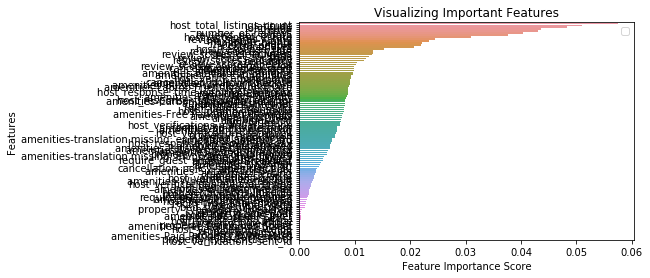

In [345]:
# Creating a bar plot
sns.barplot(x=feature_importance, y=feature_importance.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [373]:
df_exp2 = df.drop(['zipcode','neighbourhood_cleansed'],axis=1)

In [374]:
# Create dummi variables for the other categorical columns
cat_vars = df_exp2.select_dtypes(include=['object']).copy().columns
for var in  cat_vars:
    # for each cat add dummy var, drop original column
    df_exp2 = pd.concat([df_exp2.drop(var, axis=1), pd.get_dummies(df_exp2[var],prefix=var, prefix_sep='-', drop_first=True)], axis=1)

In [375]:
#Split data into an X matrix and a response vector y
y = df_exp2['occupation_percentage']
x = df_exp2.drop('occupation_percentage', axis=1)

# Split dataset into training set and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [376]:
#Create a Gaussian Classifier
rfc=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
rfc.fit(x_train,y_train)

y_pred=rfc.predict(x_test)

In [377]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6153071500503524


In [378]:
feature_importance = pd.Series(rfc.feature_importances_,index=list(x.columns)).sort_values(ascending=False)

In [379]:
dict(feature_importance)

{'host_total_listings_count': 0.05532462077523368,
 'latitude': 0.04922422069085305,
 'longitude': 0.04430795082561762,
 'number_of_reviews': 0.04312619663782672,
 'price': 0.042252042997739526,
 'reviews_per_month': 0.039805573336811895,
 'host_acceptance_rate': 0.03906432482872459,
 'review_scores_rating': 0.027933706605432852,
 'host_response_rate': 0.02479190120439997,
 'host_response_time-nan': 0.023933680109013873,
 'minimum_nights': 0.02303619630181325,
 'maximum_nights': 0.021806982456285696,
 'extra_people': 0.021503217906703762,
 'accommodates': 0.020803658235260557,
 'review_scores_value': 0.014204667445679752,
 'review_scores_cleanliness': 0.014007085714633731,
 'beds': 0.012608057799085933,
 'review_scores_accuracy': 0.012368336180994614,
 'review_scores_location': 0.012336490301345144,
 'guests_included': 0.012102054113038453,
 'bedrooms': 0.011771815692067415,
 'host_response_time-within a few hours': 0.011187652907239653,
 'cancellation_policy-strict': 0.010665573129620

In [223]:
df_exp3 = df.drop(['zipcode','neighbourhood_cleansed','amenities','host_verifications','property_type','bed_type',"room_type"],axis=1)

In [224]:
# Create dummi variables for the other categorical columns
cat_vars = df_exp3.select_dtypes(include=['object']).copy().columns
for var in  cat_vars:
    # for each cat add dummy var, drop original column
    df_exp3 = pd.concat([df_exp3.drop(var, axis=1), pd.get_dummies(df_exp3[var],prefix=var, prefix_sep='-', drop_first=True)], axis=1)

In [225]:
df_exp3

,host_response_rate,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,guests_included,extra_people,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,occupation_percentage,host_isin_city,host_response_time-within a day,host_response_time-within a few hours,host_response_time-within an hour,host_is_superhost-t,host_has_profile_pic-t,host_identity_verified-t,instant_bookable-t,cancellation_policy-moderate,cancellation_policy-strict,cancellation_policy-super_strict_30,require_guest_profile_picture-t,require_guest_phone_verification-t
1,100.0,1,42.286241,-71.134374,2,1.0,1.0,1.0,65.0,0,0.0,2,15,36,94.000000,10.000000,9.000000,10.000000,10.000000,9.000000,9.000000,1.300000,1,1,0,0,1,0,1,1,1,1,0,0,0,0
2,100.0,1,42.292438,-71.135765,2,1.0,1.0,1.0,65.0,1,20.0,3,45,41,98.000000,10.000000,9.000000,10.000000,10.000000,9.000000,10.000000,0.470000,1,1,0,1,0,1,1,1,0,1,0,0,1,0
4,100.0,1,42.284512,-71.136258,2,1.5,1.0,2.0,79.0,1,0.0,2,31,29,99.000000,10.000000,10.000000,10.000000,10.000000,9.000000,10.000000,2.250000,1,1,0,0,1,1,1,1,0,0,0,0,0,0
5,100.0,2,42.291690,-71.131893,2,1.0,1.0,1.0,75.0,1,0.0,2,1125,8,100.000000,10.000000,10.000000,10.000000,10.000000,9.000000,10.000000,1.700000,5,1,0,1,0,1,1,1,0,0,0,0,0,0
6,98.0,5,42.281390,-71.131190,3,1.0,1.0,2.0,100.0,1,25.0,1,1125,57,90.000000,10.000000,10.000000,10.000000,10.000000,9.000000,9.000000,4.000000,1,0,0,0,1,0,1,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3527,71.0,363,42.349670,-71.130489,6,2.0,3.0,3.0,279.0,1,0.0,3,1125,0,91.923429,9.431957,9.260687,9.642994,9.646565,9.423768,9.166157,1.958366,5,0,0,1,0,0,1,1,1,0,1,0,0,0
3528,100.0,1,42.358791,-71.128565,2,1.0,1.0,1.0,50.0,1,0.0,2,6,2,100.000000,9.000000,8.000000,10.000000,10.000000,9.000000,10.000000,0.860000,5,1,0,0,1,0,1,1,1,0,0,0,0,0
3530,100.0,6,42.355342,-71.138265,1,1.5,1.0,1.0,60.0,1,0.0,1,1125,0,91.923429,9.431957,9.260687,9.642994,9.646565,9.423768,9.166157,1.958366,1,1,0,0,1,0,1,0,0,0,1,0,0,0
3531,100.0,8,42.358198,-71.129016,2,2.0,1.0,1.0,75.0,0,0.0,1,1125,32,97.000000,10.000000,10.000000,10.000000,10.000000,9.000000,10.000000,2.320000,2,1,0,0,1,0,1,1,1,0,0,0,0,0


In [226]:
#Split data into an X matrix and a response vector y
y = df_exp3['occupation_percentage']
x = df_exp3.drop('occupation_percentage', axis=1)

# Split dataset into training set and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [227]:
#Create a Gaussian Classifier
rfc=RandomForestClassifier(n_estimators=500)

#Train the model using the training sets y_pred=clf.predict(X_test)
rfc.fit(x_train,y_train)

y_pred=rfc.predict(x_test)

In [228]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5846867749419954


In [229]:
feature_importance = pd.Series(rfc.feature_importances_,index=list(x.columns)).sort_values(ascending=False)

In [230]:
dict(feature_importance)

{'host_total_listings_count': 0.08799241711745365,
 'latitude': 0.08602946257094203,
 'longitude': 0.08361827850102736,
 'price': 0.07723358625396642,
 'number_of_reviews': 0.06609994118372746,
 'reviews_per_month': 0.06572497998546545,
 'review_scores_rating': 0.04470478219809167,
 'maximum_nights': 0.03877695713772891,
 'minimum_nights': 0.037244741144500056,
 'accommodates': 0.03582756067266453,
 'extra_people': 0.03364410069250053,
 'host_response_rate': 0.03352419201978669,
 'guests_included': 0.02121697410874141,
 'beds': 0.020956118167001287,
 'bedrooms': 0.02074202329887793,
 'review_scores_cleanliness': 0.020095426084697252,
 'review_scores_value': 0.019402214754985006,
 'review_scores_location': 0.019350911296012397,
 'review_scores_accuracy': 0.016872114673352166,
 'cancellation_policy-strict': 0.015808550192952155,
 'bathrooms': 0.015205597000018983,
 'review_scores_communication': 0.01480131672509795,
 'host_identity_verified-t': 0.014279416076452025,
 'host_isin_city': 0.

In [347]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(activation='relu', solver='adam', max_iter=500)
mlp.fit(x_train,y_train)

predict_train = mlp.predict(X_train)
predict_test = mlp.predict(X_test)

ValueError: shapes (2009,35) and (111,100) not aligned: 35 (dim 1) != 111 (dim 0)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_train,predict_train))
print(classification_report(y_train,predict_train))

In [348]:
x_train

,host_response_rate,host_acceptance_rate,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,guests_included,extra_people,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,host_isin_city,host_verifications-email,host_verifications-phone,host_verifications-facebook,host_verifications-linkedin,host_verifications-amex,host_verifications-reviews,host_verifications-jumio,host_verifications-kba,host_verifications-manual_online,host_verifications-manual_offline,host_verifications-google,host_verifications-sent_id,host_verifications-weibo,amenities-TV,amenities-Internet,amenities-Wireless Internet,amenities-Air Conditioning,amenities-Kitchen,amenities-Pets Allowed,amenities-Pets live on this property,amenities-Dog(s),amenities-Heating,amenities-Family/Kid Friendly,amenities-Washer,amenities-Dryer,amenities-Smoke Detector,amenities-Carbon Monoxide Detector,amenities-Fire Extinguisher,amenities-Essentials,amenities-Shampoo,amenities-Lock on Bedroom Door,amenities-Hangers,amenities-Hair Dryer,amenities-Iron,amenities-Cable TV,amenities-Free Parking on Premises,amenities-First Aid Kit,amenities-Safety Card,amenities-translation missing: en.hosting_amenity_49,amenities-translation missing: en.hosting_amenity_50,amenities-Breakfast,amenities-Cat(s),amenities-24-Hour Check-in,amenities-Indoor Fireplace,amenities-Laptop Friendly Workspace,amenities-Hot Tub,amenities-Buzzer/Wireless Intercom,amenities-Other pet(s),amenities-Washer / Dryer,amenities-Smoking Allowed,amenities-Suitable for Events,amenities-Gym,amenities-Wheelchair Accessible,amenities-Elevator in Building,amenities-Pool,amenities-Doorman,amenities-Paid Parking Off Premises,amenities-Free Parking on Street,host_response_time-within a day,host_response_time-within a few hours,host_response_time-within an hour,host_is_superhost-t,host_has_profile_pic-t,host_identity_verified-t,property_type-Bed & Breakfast,property_type-Boat,property_type-Condominium,property_type-Dorm,property_type-Entire Floor,property_type-Guesthouse,property_type-House,property_type-Loft,property_type-Other,property_type-Townhouse,property_type-Villa,room_type-Private room,room_type-Shared room,bed_type-Couch,bed_type-Futon,bed_type-Pull-out Sofa,bed_type-Real Bed,instant_bookable-t,cancellation_policy-moderate,cancellation_policy-strict,cancellation_policy-super_strict_30,require_guest_profile_picture-t,require_guest_phone_verification-t
2610,99.0,93.0,24,42.359296,-71.140197,6,1.0,3.0,3.0,283.0,1,0.0,3,90,7,97.000000,10.000000,10.000000,10.000000,10.000000,9.000000,9.000000,1.840000,1,1,1,0,0,0,1,0,1,0,0,0,0,0,0,1,1,1,1,0,0,0,1,1,1,1,1,1,1,1,1,0,1,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
2414,98.0,55.0,749,42.344756,-71.100621,5,2.0,2.0,2.0,319.0,1,0.0,3,1125,1,60.000000,10.000000,8.000000,10.000000,10.000000,10.000000,4.000000,0.640000,0,1,1,0,0,0,1,1,0,0,0,0,0,0,1,1,1,1,1,0,0,0,1,1,1,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
2050,100.0,69.0,122,42.364517,-71.063561,2,1.0,1.0,1.0,220.0,1,0.0,10,1125,0,91.923429,9.431957,9.260687,9.642994,9.646565,9.423768,9.166157,1.958366,0,1,1,0,0,0,1,1,1,0,0,0,0,0,1,1,1,1,1,0,0,0,1,1,1,1,1,1,0,1,1,0,1,1,1,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,1,1,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
2369,96.0,68.0,313,42.344313,-71.098185,3,1.0,1.0,2.0,285.0,1,0.0,3,1125,9,93.000000,9.000000,9.000000,9.000000,9.000000,10.000000,9.000000,0.290000,0,1,1,0,0,0,1,0,1,1,1,0,0,0,1,1,1,1,1,0,0,0,1,1,1,1,1,1,0,1,1,0,1,1,1,1,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,1,1,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1
211,100.0,80.0,1,42.309182,-71.110493,3,1.0,0.0,2.0,109.0,2,15.0,1,1125,16,100.000000

In [349]:
y_train

2610    3
2414    4
2050    4
2369    3
211     5
       ..
3025    3
1386    3
2969    5
2906    2
428     3
Name: occupation_percentage, Length: 2009, dtype: int64